# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


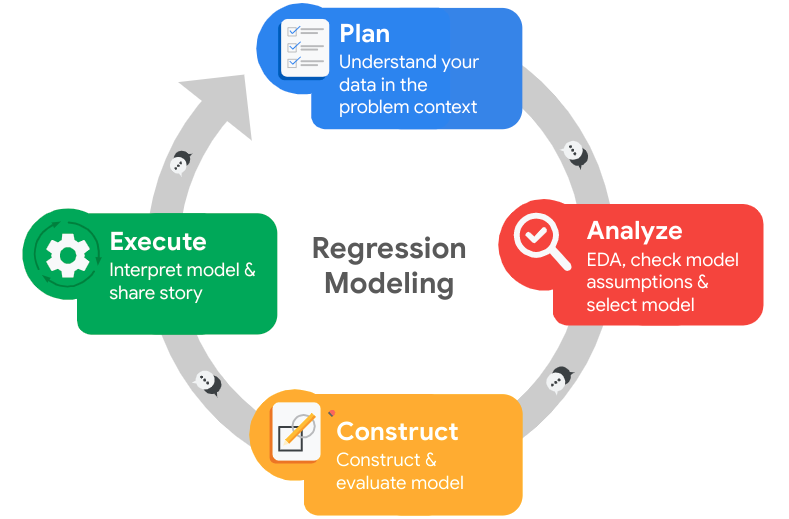

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: 
> **what’s likely to make the employee leave the company?**

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

-  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answer:**

#### Stakeholders: 
- Senior leadership team at Salifort Motors

#### Objective: 
- Increase employee retention by identifying factors that contribute to employee churn.

#### Initial Observations:
- The dataset includes various features such as job satisfaction, performance evaluation, number of projects, average monthly hours, years with the company, work accidents, promotions, department, and salary
- Key factors that might influence employee churn could be job satisfaction, number of projects, average monthly hours, and years with the company.
- The 'left' column indicates whether an employee left the company (1 for left, 0 for not left

#### Resources Used:
- Exploratory Data Analysis (EDA): Analyzing distributions, correlations, and visualizations to understand the data.
- Pandas and NumPy for data manipulation.
- Seaborn and Matplotlib for data visualization.

#### Ethical Considerations:
- Ensuring employee privacy and data security when handling sensitive information.
- Fair treatment and unbiased analysis of employee data to avoid discrimination.
- Transparency in communication of findings and recommendations to stakeholders.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.columns = [
    'satisfaction_level', 
    'last_evaluation', 
    'number_project',
    'average_monthly_working_hours', 
    'years_spent_with_company', 
    'work_accident', 
    'left',
    'promotion_last_5_years', 
    'department', 
    'salary'
]


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_working_hours', 'years_spent_with_company',
       'work_accident', 'left', 'promotion_last_5_years', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level               0
last_evaluation                  0
number_project                   0
average_monthly_working_hours    0
years_spent_with_company         0
work_accident                    0
left                             0
promotion_last_5_years           0
department                       0
salary                           0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_working_hours,years_spent_with_company,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates().reset_index(drop=True)

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_working_hours,years_spent_with_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

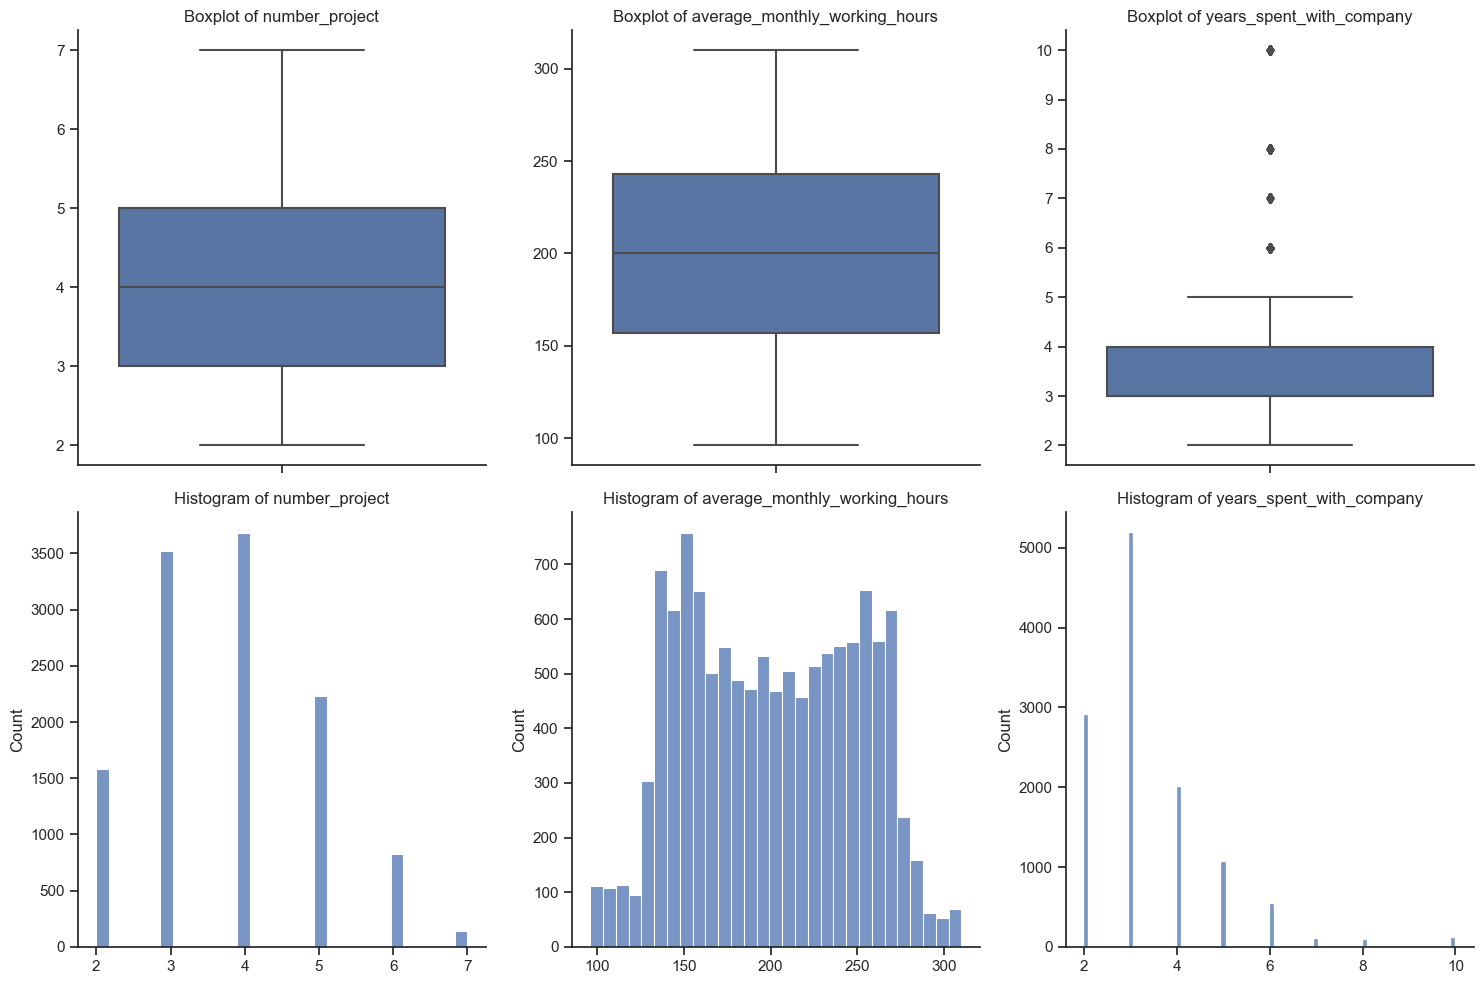

In [11]:
cols = ['number_project', 'average_monthly_working_hours', 'years_spent_with_company']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create boxplots in the first row
for i, col in enumerate(cols):
    sns.boxplot(data=df[col], ax=axes[0, i])
    axes[0, i].set_title(f"Boxplot of {col}")
    axes[0, i].set_xticklabels([])  # Remove x-axis tick labels for boxplots

# Create histograms in the second row
for i, col in enumerate(cols):
    sns.histplot(data=df[col], ax=axes[1, i])
    axes[1, i].set_title(f"Histogram of {col}")
    axes[1, i].set_xlabel('')  # Remove x-axis tick labels for boxplots   
plt.tight_layout()
sns.despine()
plt.show()


Note: Looking at the three pair of boxplots and histograms, we can see that outliers appear only in `years_spent_with_company` 

In [12]:
# Determine the number of rows containing outliers
df[df['years_spent_with_company'] >5].shape[0]

824

Note: There are 824 outliers with threshold of the boxplot = 5

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




#### Answer:

**What did you observe about the relationships between variables?**
We observed several interesting relationships between variables. For instance, there seems to be a connection between the number of projects an employee works on, their average monthly working hours, and whether they left the company. Employees who worked on a high number of projects and had longer working hours were more likely to leave. Additionally, there was an intriguing pattern between tenure and satisfaction levels, where employees with 4 years of tenure and high working hours had significantly low satisfaction levels.

**What do you observe about the distributions in the data?**
The distributions in the data varied among different variables. Notably, satisfaction levels and average monthly working hours displayed bimodal distributions, suggesting the presence of distinct employee groups. Other variables, like last evaluation, seemed to follow a more normal distribution.

**What transformations did you make with your data? Why did you choose to make those decisions?**
We performed several transformations on the data. We created "tenure_clusters" using K-means clustering to group employees with similar years spent with the company. This helped us identify distinct patterns among different tenure groups. We also utilized visualizations to better understand the relationships between variables and clusters.

**What are some purposes of EDA before constructing a predictive model?**
The primary purposes of EDA before constructing a predictive model include:
- Identifying patterns, trends, and relationships in the data.
- Detecting potential outliers and anomalies.
- Understanding variable distributions and interactions.
- Formulating hypotheses about how different factors influence the target variable.
- Informing feature selection and engineering decisions for the predictive model.

**What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**
Throughout the exploratory data analysis stage, we utilized Python libraries for data visualization, such as Matplotlib and Seaborn. These libraries offer a wide range of functions for creating insightful plots and graphs. 

**Do you have any ethical considerations in this stage?**
During the EDA process, it's important to ensure that any insights derived from the data are presented accurately and responsibly. If the data contains sensitive or personal information, ethical considerations should be taken into account to protect data privacy and adhere to relevant regulations.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed, Get percentages of people who left vs. stayed
left = pd.concat([df['left'].value_counts(), df['left'].value_counts(normalize=True)], axis=1)
left.columns = ['number','percent']
left

,number,percent
0,10000,0.833959
1,1991,0.166041


Note: The majority (83.4%) of employees are still working for the company (class 0), while a smaller percentage (0.17%) have left (class 1).

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

### Univariate 
- Categorical (Barplot, Countplot)
- Numerical (Boxplot, Histogram)

First, let's look at categorical variables with 2 options 0 and 1

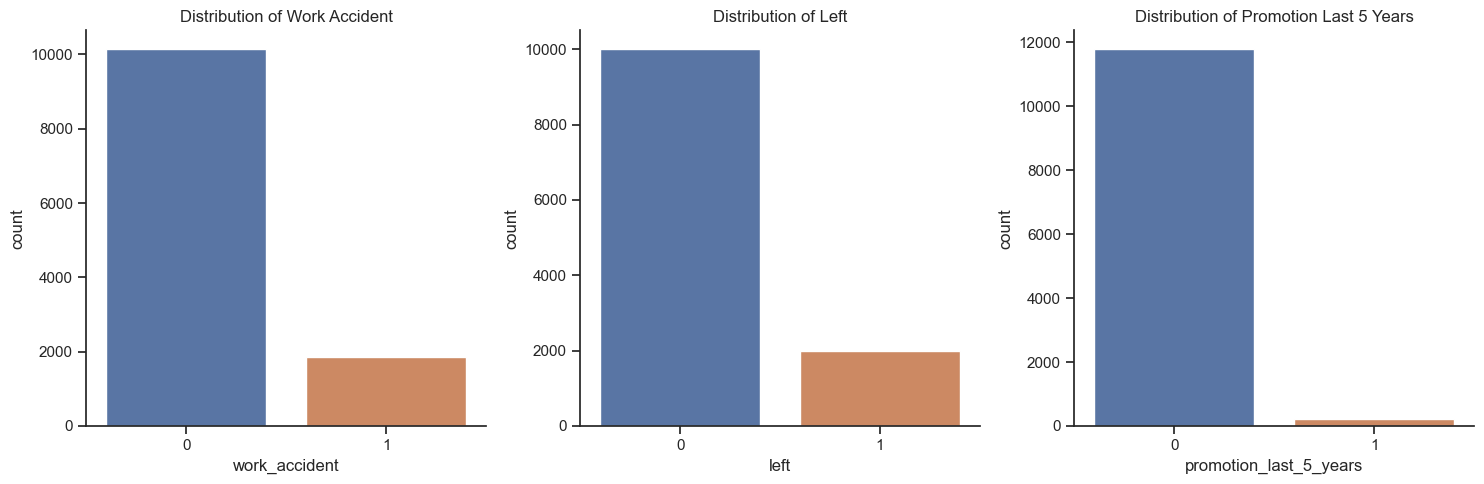

In [14]:
boo_cols = ['work_accident', 'left', 'promotion_last_5_years']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(boo_cols):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    #ax[i].set_xticklabels(['No', 'Yes'])  # Set custom tick labels for x-axis
    ax[i].set_xlabel(col)  # Set x-axis label

plt.tight_layout()
sns.despine();

#### Note: 
Observing the variables `work_accident`, `left`, and `promotion_last_5_years`, we notice a significant imbalance between their values. The count of employees with a value of 0 in these variables is notably higher than those with a value of 1. Specifically, in the case of `work_accident` and `left`, the count of 1s represents only about one-fourth of the count of 0s. Moreover, the number of individuals who have received a promotion in the last five years is minimal, indicating a low frequency of promotions within the company. This skewed distribution may have implications for our analysis and model development.

Plotting categorical variables with more than 2 values

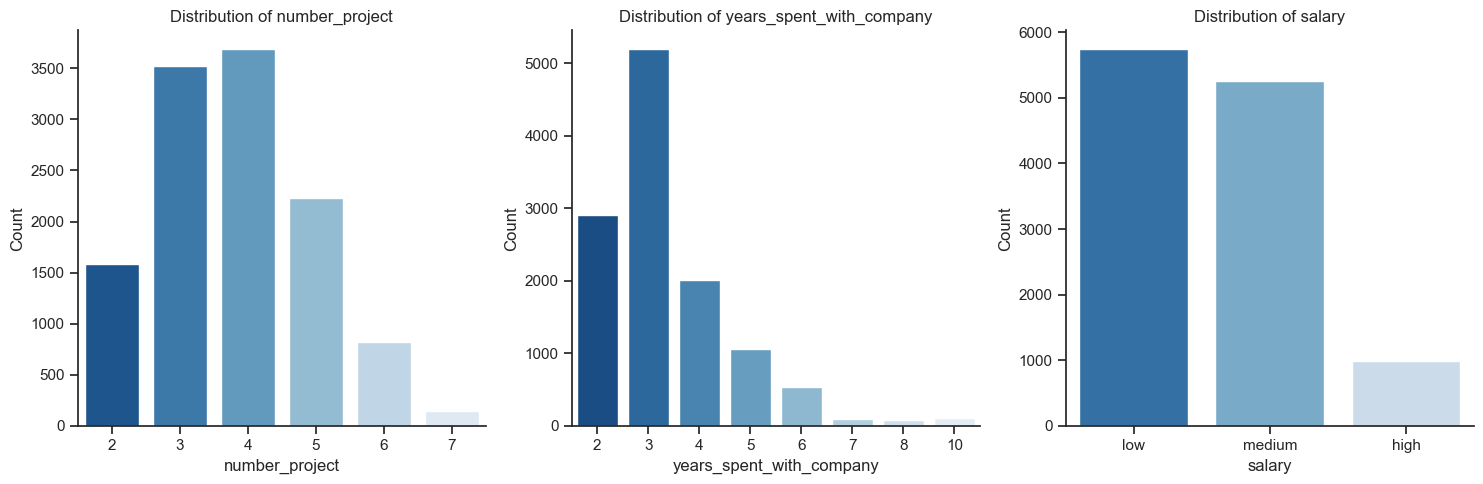

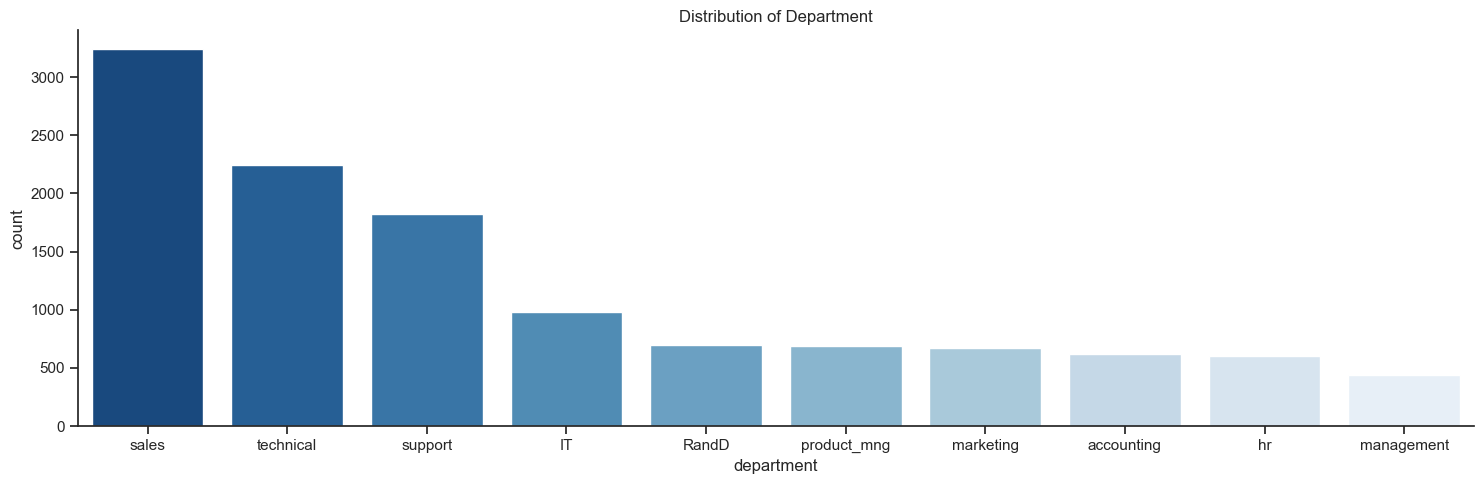

In [15]:
category_cols = ['number_project', 'years_spent_with_company', 'salary']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each categorical variable
for i, col in enumerate(category_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Blues_r')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
sns.despine()
plt.show();

department_order = df['department'].value_counts().index
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='department', order=department_order, palette='Blues_r')
plt.title('Distribution of Department')
sns.despine()
plt.tight_layout()
plt.show();

#### Note: 
Upon closer examination of other categorical variables within Salifort Motors:

- The variable `number_project` indicates that a substantial portion of employees are engaged in around 3, 4, or 5 projects, suggesting that most individuals are assigned to this range.
- In relation to `years_spent_with_company`, a larger proportion of employees have been with the company for approximately 3 years, followed by 2 years and 4 years. The number of individuals decreases notably after 4 years, with only a small fraction having tenures of 7, 8, or 10 years.
- Analyzing `salary`, it is evident that the majority of employees receive low to medium salaries, while only a minor segment enjoys a high salary.
- Focusing on the `department` variable, a significant proportion of employees are affiliated with the Sales, Technical, and Support Departments. Conversely, the RandD, Product_mng, Marketing, Accounting, and HR departments each consist of approximately 600 individuals out of the total 10000 employees. The Management has the smallest workforce.

These insights provide a deeper understanding of the distribution of categorical variables and can serve as a basis for further analysis and decision-making at Salifort Motors.

Now, we will plot numerical variables

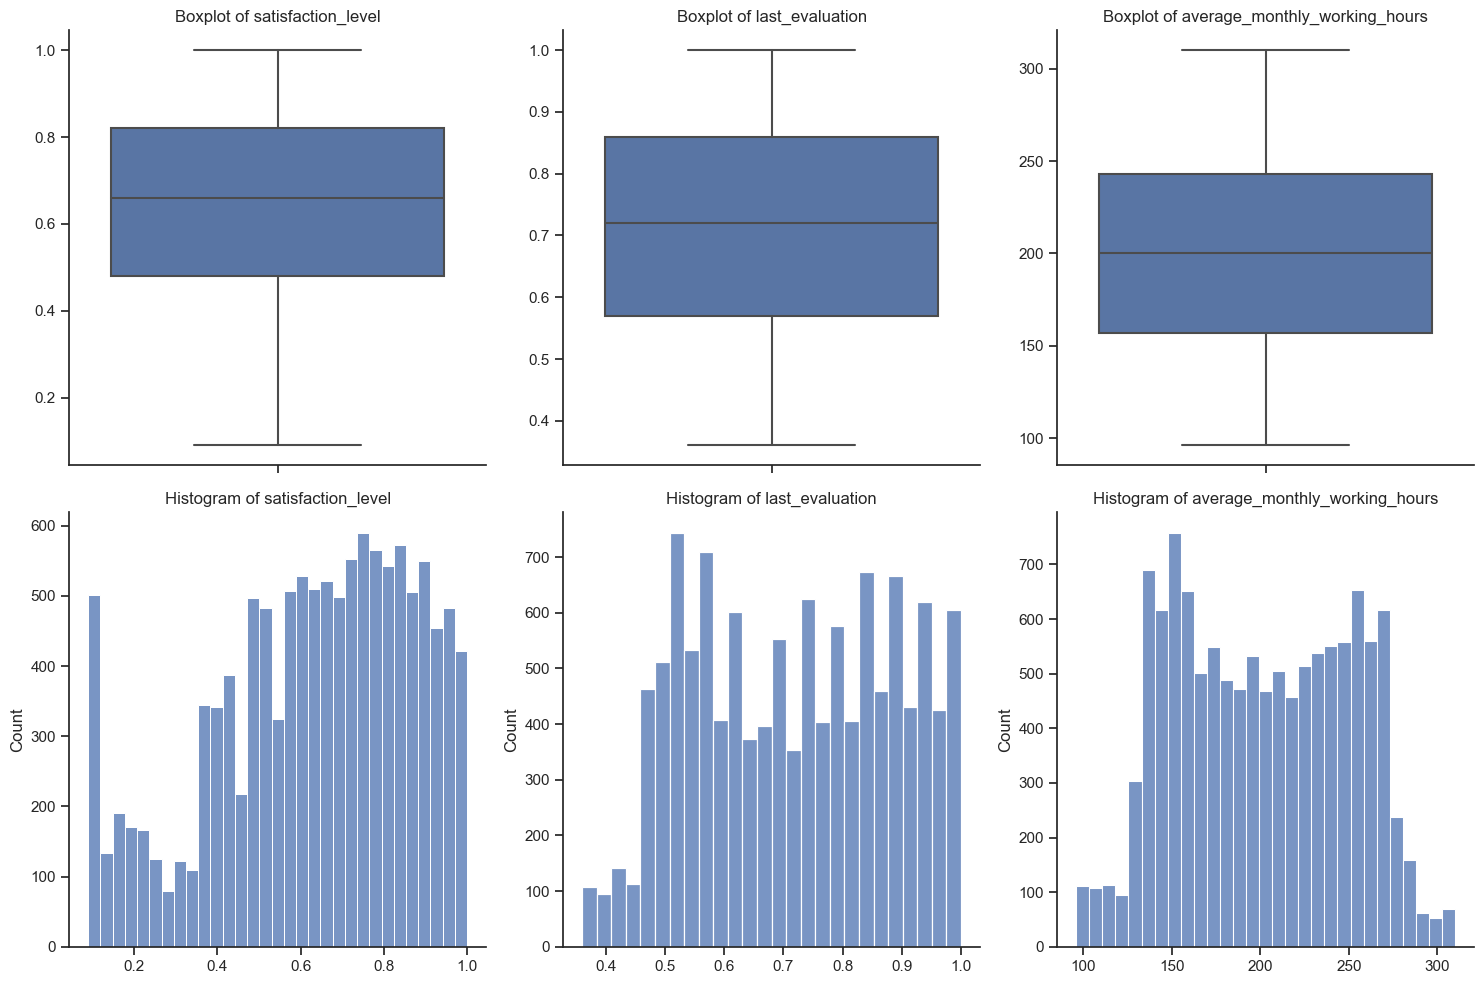

In [16]:
cols = ['satisfaction_level', 'last_evaluation', 'average_monthly_working_hours']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Create boxplots in the first row
for i, col in enumerate(cols):
    sns.boxplot(data=df[col], ax=axes[0, i])
    axes[0, i].set_title(f"Boxplot of {col}")
    axes[0, i].set_xticklabels([])  # Remove x-axis tick labels for boxplots

# Create histograms in the second row
for i, col in enumerate(cols):
    sns.histplot(data=df[col], ax=axes[1, i])
    axes[1, i].set_title(f"Histogram of {col}")
    axes[1, i].set_xlabel('')  # Remove x-axis tick labels for boxplots   
plt.tight_layout()
sns.despine()
plt.show()


#### Note:

Further insights into the remaining three numerical variables are as follows:

- The `satisfaction_level` and `last_evaluation` variables exhibit values between 0 and 1. The `satisfaction_level` has a slight left-skewed distribution, centered around a median of approximately 0.75. Conversely, `last_evaluation` demonstrates a relatively uniform distribution of values.
- The distribution of `average_monthly_working_hours` is characterized by a bimodal pattern, with two distinct peaks occurring at approximately 150 and 250 hours.

These observations provide a comprehensive understanding of the distribution and characteristics of the remaining numerical variables within the dataset at Salifort Motors.

### Bivariate

- Categorical vs Categorical (Bar chart)
- Numerical vs Numerical (Scatter plot)
- Categorical vs Numerical (Boxplot, Violin plot)

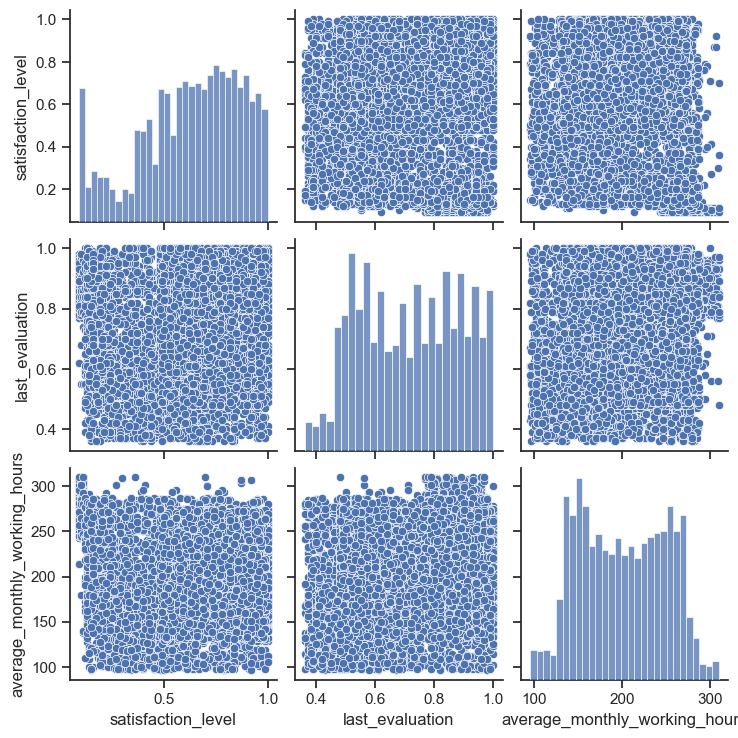

In [17]:
sns.pairplot(data=df[['satisfaction_level', 'last_evaluation', 'average_monthly_working_hours']]);

#### Note:

The scatterplots between `satisfaction_level`, `last_evaluation` and `average_monthly_working_hours` appear scattered randomly and don't follow any discernible pattern. It may indicate that there is no significant linear relationship between these variables. 

This is indicative of data manipulation or synthetic data.

Now survey categorical variables

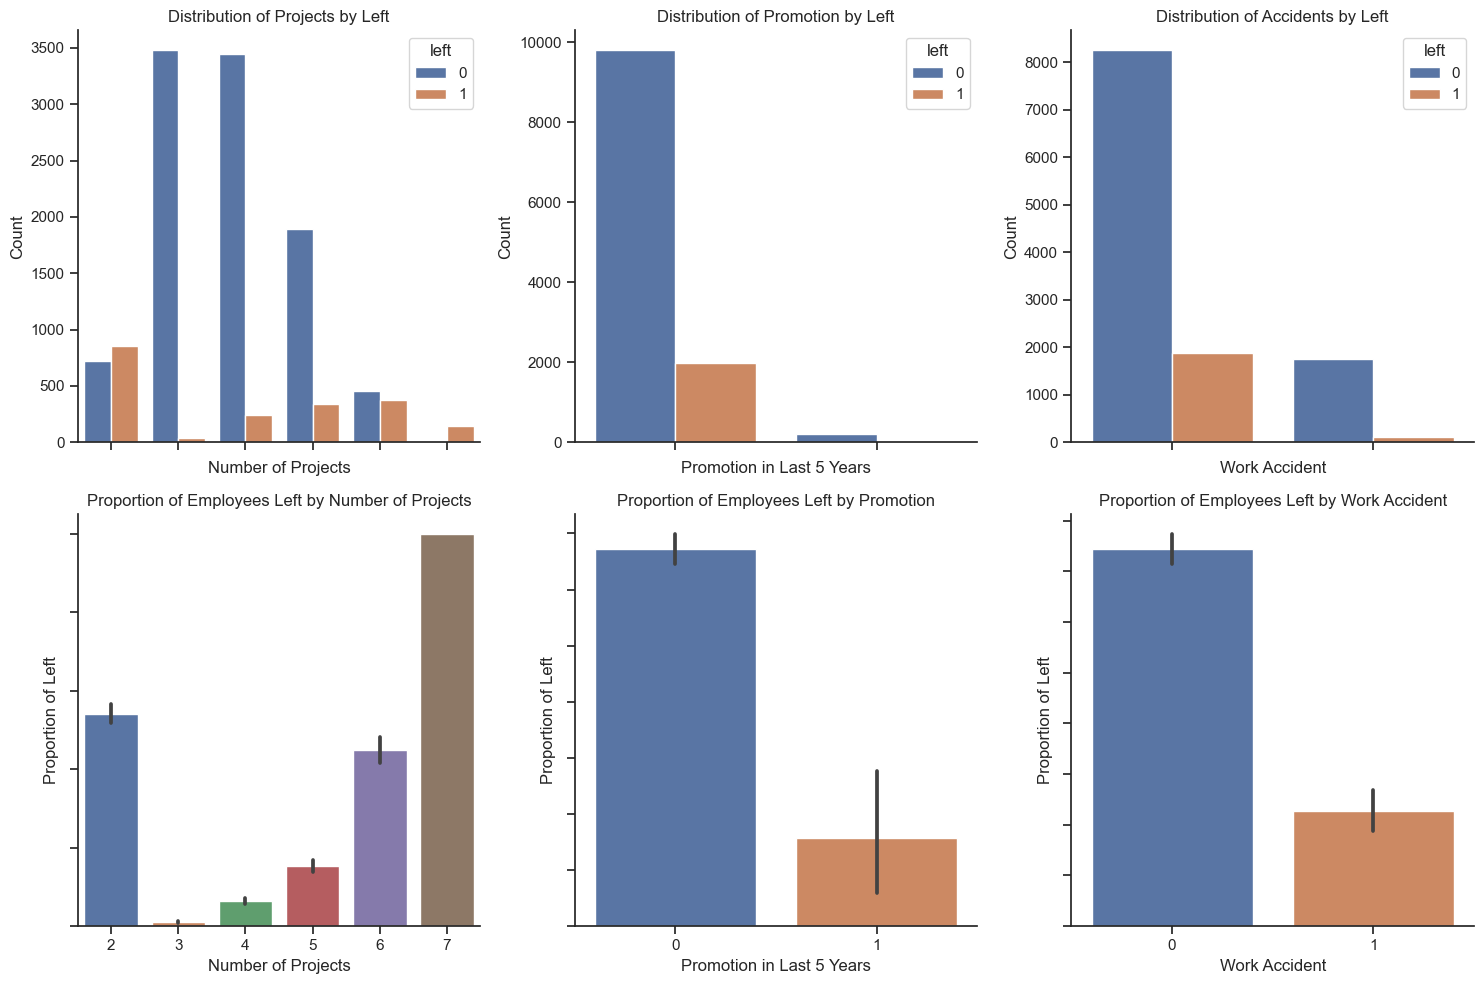

In [18]:
# Create a plot as needed
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data=df, x='number_project', hue='left', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Projects by Left')
ax[0, 0].set_xlabel('Number of Projects')
ax[0, 0].set_ylabel('Count')
sns.countplot(data=df, x='promotion_last_5_years', hue='left', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Promotion by Left')
ax[0, 1].set_xlabel('Promotion in Last 5 Years')
ax[0, 1].set_ylabel('Count')
sns.countplot(data=df, x='work_accident', hue='left', ax=ax[0, 2])
ax[0, 2].set_title('Distribution of Accidents by Left')
ax[0, 2].set_xlabel('Work Accident')
ax[0, 2].set_ylabel('Count')
ax[0, 0].set_xticklabels([])
ax[0, 1].set_xticklabels([])
ax[0, 2].set_xticklabels([])


sns.barplot(data=df, x='number_project', y='left', ax=ax[1, 0])
ax[1, 0].set_title('Proportion of Employees Left by Number of Projects')
ax[1, 0].set_xlabel('Number of Projects')
ax[1, 0].set_ylabel('Proportion of Left')
sns.barplot(data=df, x='promotion_last_5_years', y='left', ax=ax[1, 1])
ax[1, 1].set_title('Proportion of Employees Left by Promotion')
ax[1, 1].set_xlabel('Promotion in Last 5 Years')
ax[1, 1].set_ylabel('Proportion of Left')
sns.barplot(data=df, x='work_accident', y='left', ax=ax[1, 2])
ax[1, 2].set_title('Proportion of Employees Left by Work Accident')
ax[1, 2].set_xlabel('Work Accident')
ax[1, 2].set_ylabel('Proportion of Left')
ax[1, 0].set_yticklabels([])
ax[1, 1].set_yticklabels([])
ax[1, 2].set_yticklabels([])

plt.tight_layout()
sns.despine();

#### Note:

- Analyzing the first chart, a clear trend emerges: individuals who are assigned to work on 3 projects exhibit a higher likelihood of remaining with the company. Conversely, a significant portion of those assigned to 2 projects are more prone to leaving. As the project count increases beyond 4, the balance shifts, and a greater number of employees opt to leave the company rather than continue their tenure.
- Notably, approximately one-fifth of individuals who have not received a promotion within the last 5 years opt to leave the company. Conversely, the occurrence of work-related accidents does not appear to significantly influence the decision to leave.

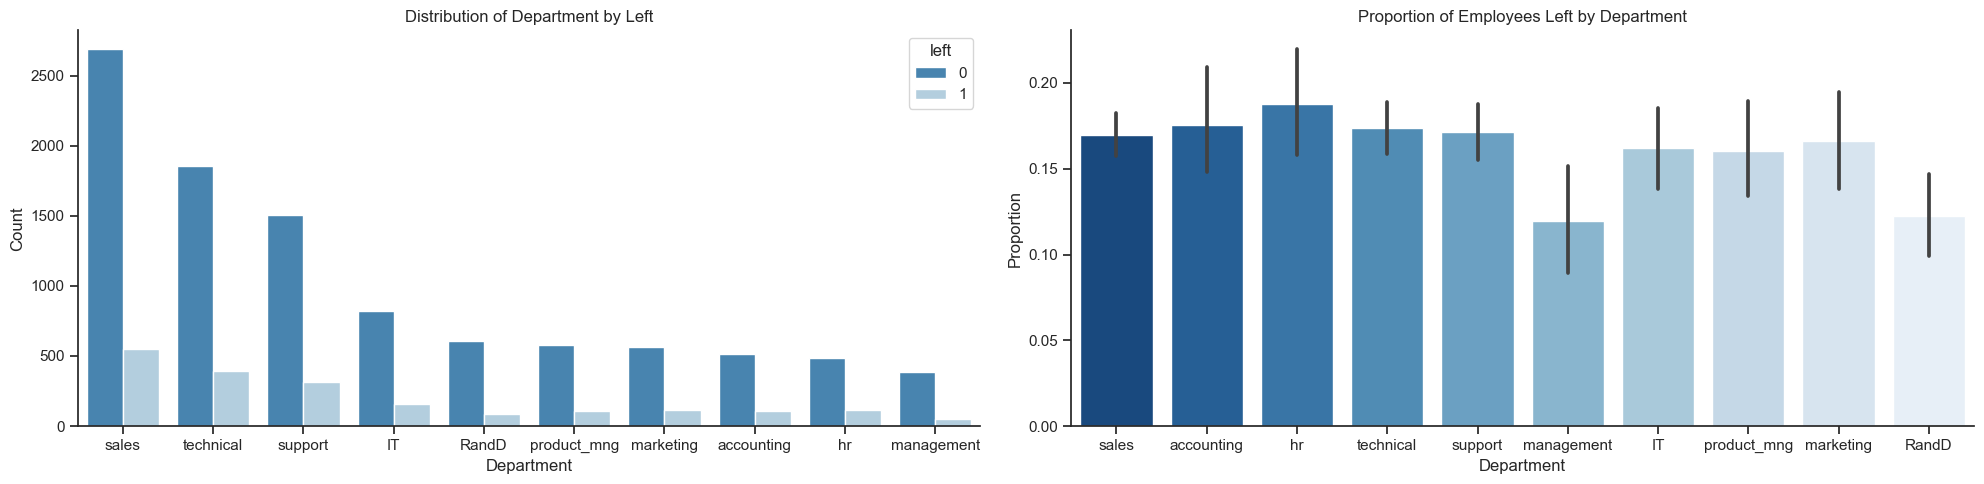

In [19]:
department_order = df['department'].value_counts().index

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the first subplot
sns.countplot(data=df, x='department', order=department_order, hue='left', ax=axes[0], palette='Blues_r')
axes[0].set_title('Distribution of Department by Left')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Count')
sns.despine()

# Plot the second subplot
sns.barplot(data=df, x='department', y='left', ax=axes[1], palette='Blues_r')
axes[1].set_title('Proportion of Employees Left by Department')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Proportion')
sns.despine()

plt.tight_layout()
plt.show()


#### Note: 

Upon analyzing the department distribution, it appears that the distribution of employees who left and stayed is relatively balanced across departments, except for the "Management" department. Employees in the "Management" department have a higher tendency to stay with the company, which could be attributed to their higher positions and correspondingly higher salaries compared to other departments. This observation suggests that department alone might not be a strong predictor of employee attrition. 

We will check years and salary 

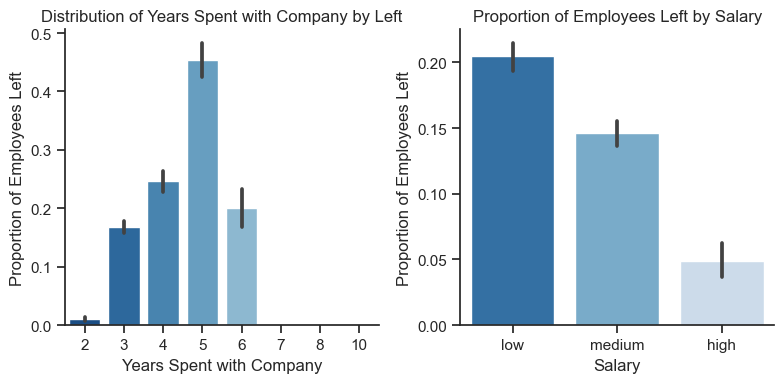

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first subplot
sns.barplot(data=df, x='years_spent_with_company', y='left', ax=axes[0], palette='Blues_r')
axes[0].set_title('Distribution of Years Spent with Company by Left')
axes[0].set_xlabel('Years Spent with Company')
axes[0].set_ylabel('Proportion of Employees Left')
sns.despine()

# Plot the second subplot
sns.barplot(data=df, x='salary', y='left', ax=axes[1], palette='Blues_r')
axes[1].set_title('Proportion of Employees Left by Salary')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Proportion of Employees Left')
sns.despine()

plt.tight_layout()
plt.show()


### Note:

Observation based on the plots:

- Employees with around 3 years of experience start to leave their jobs, peaking at around 5 years. After 6 years, employees tend to choose to stay with the company.
- The likelihood of employees quitting their jobs is higher for those with low and medium salaries compared to those with high salaries.

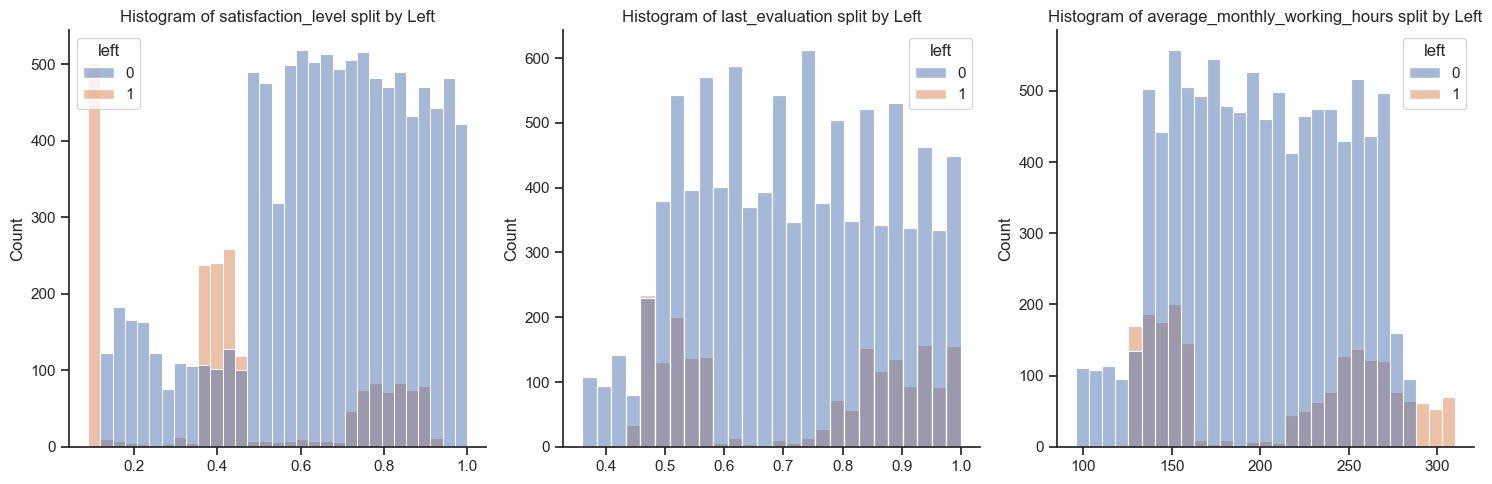

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cols = ['satisfaction_level', 'last_evaluation', 'average_monthly_working_hours']

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='left', ax=axes[i])
    axes[i].set_title(f"Histogram of {col} split by Left")
    axes[i].set_xlabel('')  # Remove x-axis tick labels for boxplots   
plt.tight_layout()
sns.despine()
plt.show()


#### Note:

Upon analyzing the histograms split by the `Left` variable, we can clearly identify two distinct groups of employees who are leaving the company in each histogram:

**Histogram 1: Satisfaction Level**

The first histogram showcases two prominent clusters of left employees. The initial cluster is characterized by a satisfaction level of around 0.4, indicating a lower contentment. The second cluster stands out with a satisfaction level near 0.8, portraying a higher degree of job satisfaction.

**Histogram 2: Last Evaluation**

In the second histogram, distinct groups also emerge based on the last evaluation scores. The first left group centers around a score of approximately 0.5, indicating a moderate evaluation. The second group displays a range of scores, mostly concentrated between 0.8 and 1, highlighting varying levels of performance assessment.

**Histogram 3: Average Monthly Working Hours**

The third histogram accentuates two distinct left employee cohorts. One group is notable for dedicating an average of about 150 working hours per month. The other group is characterized by higher working hours, clustered predominantly between 250 and beyond 300 hours per month.

### Multivariate
- Heatmap, Grouped/Stacked bar chart
- 3D Scatter Plot
- Boxplot, Violin Plot with Hue

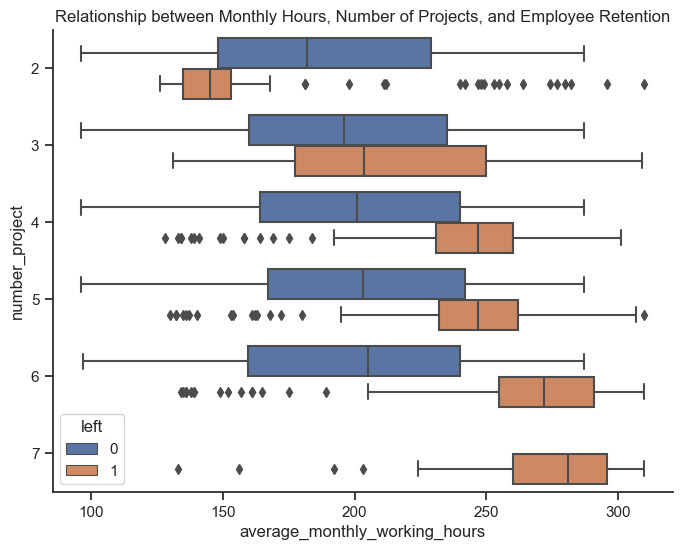

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='average_monthly_working_hours', y='number_project', hue='left', orient="h")
plt.title('Relationship between Monthly Hours, Number of Projects, and Employee Retention')
sns.despine();

#### Note:

Upon a closer examination of the data and visualization, several noteworthy patterns emerge:

##### 1 Relationship between Projects and Working Hours:
- As anticipated, there appears to be a natural connection between the number of projects an employee is assigned and their average monthly working hours. This is evident from the increasing mean working hours as the number of projects increases for both groups of employees who stayed and left.
- Nevertheless, there are intriguing nuances within this relationship that deserve attention.

##### 2 Two Departure-Related Patterns:
**Group A: Reduced Working Hours**
   - A significant group of departing employees exhibit a distinct behavior. They work significantly fewer hours compared to their peers who are assigned the same number of projects. This phenomenon might imply several possibilities:
     - This subset could include employees who were already in the process of leaving or had been given fewer hours as they prepared to depart.
     - There's also a chance that these individuals were terminated, resulting in their reduced workload.
   
**Group B: Elevated Working Hours**
   - Another noteworthy segment of employees who left the company worked notably more hours than the rest. This could suggest:
     - This group might represent employees who were actively contributing and investing considerable time in their projects before deciding to quit.
     - Their departure could indicate a potential talent loss, as they likely played a significant role in project outcomes.
     
##### 3 Departures and Project Load:
- Notably, employees assigned to work on seven projects consistently opted to leave the company. Their average monthly working hours were strikingly high, averaging around 280 hours per month.
- Additionally, individuals engaged in four to six projects share a similar trend. While those who stayed display a consistent IQR of approximately 160 to 240 hours of working time per month, those who left exhibit a narrower and higher IQR of around 240 to 270 hours.
- Remarkably, the group assigned to six projects and subsequently chose to leave showcased an average monthly working hours range of roughly 255 to 290. This observation further underscores the potential interplay between project allocation, working hours, and attrition dynamics.

##### 4 Ideal Project Load and Work-Life Balance:
- The visualization indicates a potential equilibrium point around 3 to 4 projects. For employees who decided to remain with the company, their average monthly working hours stabilize at approximately 200 hours. This observation suggests that a moderate project load may contribute to a healthier work-life balance and potentially aid in retaining employees.

##### 5 Overworking Concerns:
- Under the assumption of a standard 40-hour work week and two weeks of vacation per year, the anticipated average monthly working hours for Monday-to-Friday employees would be around 160-200 hours. Strikingly, except for those involved in two projects who left, all other groups exceed this threshold. This raises concerns about potential overworking across the employee spectrum, even for those who remained with the company.

##### 6 Further Steps:
- As a next step, it could be insightful to validate whether all employees assigned to seven projects indeed left the company, shedding light on this specific pattern's significance.
- We can create clusters for `average_monthly_working_hours` to go deeper.

This comprehensive analysis underscores the intricate relationship between project allocation, working hours, and employee retention dynamics. Further investigation into these patterns could provide valuable insights for enhancing employee satisfaction and retention strategies.

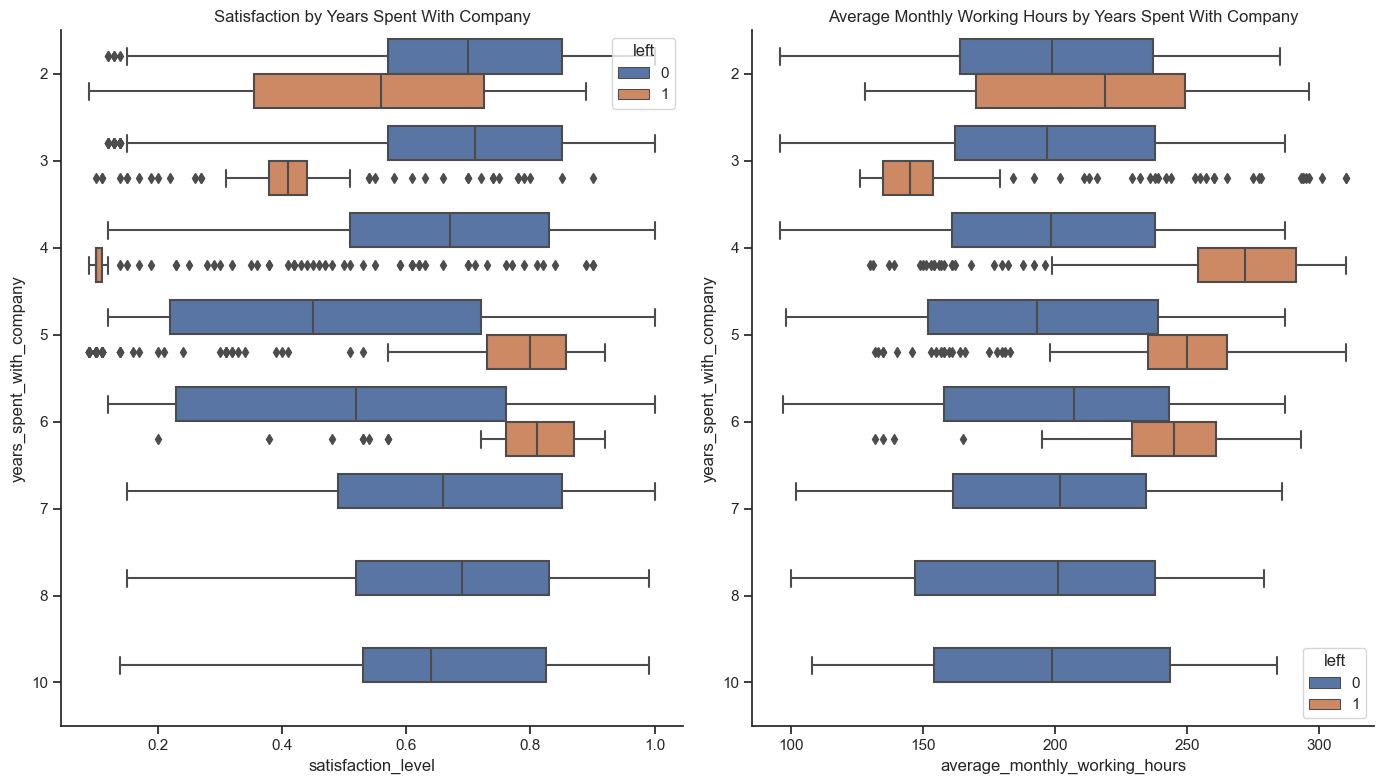

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

sns.boxplot(data=df, x='satisfaction_level', y='years_spent_with_company', hue='left', orient="h", ax=ax[0])
ax[0].set_title('Satisfaction by Years Spent With Company')
sns.despine()
sns.boxplot(data=df, x='average_monthly_working_hours', y='years_spent_with_company', hue='left', orient="h", ax=ax[1])
ax[1].set_title('Average Monthly Working Hours by Years Spent With Company')
plt.tight_layout()
sns.despine();

#### Note:

##### Overall trend:
- Notably, the distribution of satisfaction levels among employees working for durations ranging from 2 to 10 years remains relatively consistent, predominantly falling within the 0.6 to 0.8 range.

##### Special point with 5-6 tenure group
- However, a compelling contrast emerges within the subgroup of individuals with 5 to 6 years of tenure. Those who elected to stay exhibit a pronounced dip in satisfaction levels, suggesting potential dissatisfaction compared to their counterparts in other tenure groups.
- Intriguingly, this trend takes an intriguing turn for those who chose to leave the company within the same 5 to 6-year tenure bracket. This departing group showcases notably higher satisfaction levels, hovering around 0.8.

##### Group 3 and 4 Tenure 
- A particularly noteworthy pattern becomes evident when investigating the interplay between satisfaction levels and years spent with the company. Specifically, among individuals with a tenure of 4 years, those who endure demanding monthly workloads ranging from 260 to 280 hours showcase significantly depressed satisfaction levels, characterized by a median hovering around 0.1. It is remarkable that all individuals fitting this profile chose to leave the company, underscoring the potential impact of this combination on employee attrition.
- Intriguingly, those who chose to remain within both the 3 and 4-year tenure brackets exhibit a delicate equilibrium between their working hours and satisfaction levels. This harmonious interplay possibly contributes to their decision to stay within the company, despite the demands of their roles.
- An intriguing anomaly presents itself within the group with 3 years of tenure. The departure trend for this group defies expectations. While those who chose to leave still maintain a moderate workload, logging the lowest interquartile range (IQR) of 150 hours per month compared to other groups, their satisfaction level remains at around 0.4. This peculiar combination of relatively lower working hours and moderate satisfaction levels among departures warrants further exploration to understand the underlying factors influencing their attrition.

In [24]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


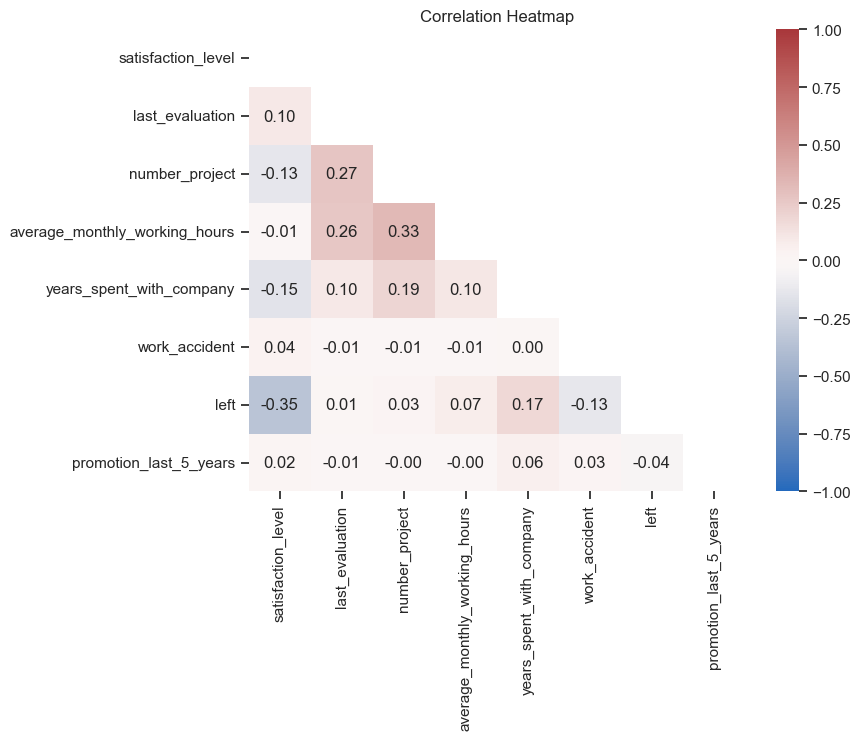

In [25]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,
            vmin=-1, vmax=1,
            annot=True,
            cmap=sns.color_palette("vlag", as_cmap=True),
            mask=np.triu(corr_matrix), fmt='.2f')
plt.title('Correlation Heatmap');

#### Note:

Some important insights from the correlation matrix:

1. **Satisfaction Level and Attrition:** The most notable correlation is between "satisfaction_level" and "left" (-0.35). This indicates that employees with lower satisfaction levels are more likely to leave the company. Employee satisfaction seems to be a significant factor in attrition.

2. **Last Evaluation:** There is a weak positive correlation between "last_evaluation" and "left" (0.01), suggesting that an employee's last evaluation score has minimal impact on their decision to leave.

3. **Number of Projects:** The correlation between "number_project" and "left" (0.03) is also weak, indicating that the number of projects an employee is working on has a minor influence on their likelihood to leave.

4. **Average Monthly Working Hours:** The correlation between "average_monthly_working_hours" and "left" (0.07) is weak, implying that employees who work longer hours might be slightly more likely to leave. To fully understand, we have to split this variable into clusters and then recalculate correlation between each working hours clusters with "left".

5. **Years Spent with Company:** "Years_spent_with_company" has a weak positive correlation with "left" (0.17), suggesting that as employees spend more years with the company, their likelihood of leaving increases slightly.

6. **Work Accident and Promotion:** There is a weak negative correlation between "work_accident" and "left" (-0.13), implying that employees who have experienced a work accident might be slightly less likely to leave. Additionally, the correlation between "promotion_last_5_years" and "left" is very weak (-0.04), indicating that recent promotions have little impact on attrition.


#### Clustering for Average monthly working hours using Kmeans

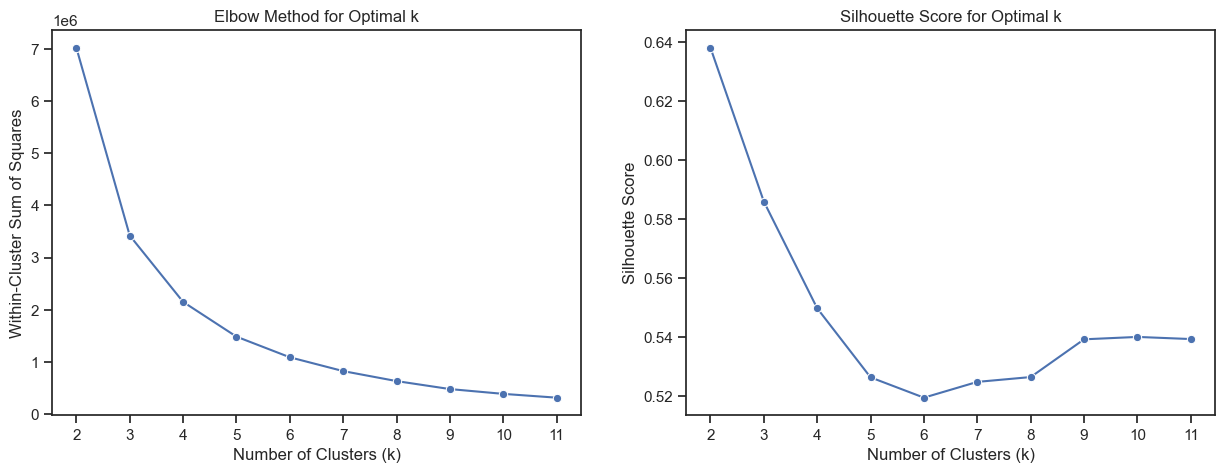

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

to_clusters = df[['average_monthly_working_hours']]
num_clusters = range(2, 12)

inertia = []
silhouette_scores = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(to_clusters)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(to_clusters, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Plot the Elbow Method 
sns.lineplot(x=num_clusters, y=inertia, marker='o', ax=axes[0])
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Within-Cluster Sum of Squares')
axes[0].set_xticks(num_clusters)
# Plot the Silhouette Score
sns.lineplot(x=num_clusters, y=silhouette_scores, marker='o', ax=axes[1])
axes[1].set_title('Silhouette Score for Optimal k')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(num_clusters)

I observe an "elbow" point at 6 based on the elbow method and a silhouette score of 1 at 8 clusters, so there might be a slight trade-off between different evaluation metrics and I will choose 6 as our number clusters

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model to the data and predict the clusters
df['working_hours_cluster'] = kmeans.fit_predict(to_clusters)

df.groupby('working_hours_cluster')[['average_monthly_working_hours']].describe()

average_monthly_working_hours                         \
                                              count        mean        std   
working_hours_cluster                                                        
0                                            3449.0  141.478110  15.201113   
1                                            2894.0  264.243607  13.971519   
2                                            2871.0  183.217346  12.082042   
3                                            2777.0  225.128556  11.587829   

                                                          
                         min    25%    50%    75%    max  
working_hours_cluster                                     
0                       96.0  134.0  144.0  153.0  162.0  
1                      245.0  254.0  262.0  272.0  310.0  
2                      163.0  173.0  183.0  194.0  204.0  
3                      205.0  215.0  225.0  235.0  244.0

In [28]:
# Calculate the mean of average_monthly_working_hours for each cluster
mean_by_cluster = df.groupby('working_hours_cluster')['average_monthly_working_hours'].mean()

# Get the order of clusters based on mean values
cluster_order = mean_by_cluster.sort_values().index

# Create a dictionary to map the current cluster labels to the new order
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}

# Map the cluster labels in the DataFrame using the mapping dictionary
df['working_hours_cluster'] = df['working_hours_cluster'].map(cluster_mapping)

# Display the updated DataFrame
df.groupby('working_hours_cluster')['average_monthly_working_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
working_hours_cluster,,,,,,,,
0,3449.0,141.478110,15.201113,96.0,134.0,144.0,153.0,162.0
1,2871.0,183.217346,12.082042,163.0,173.0,183.0,194.0,204.0
2,2777.0,225.128556,11.587829,205.0,215.0,225.0,235.0,244.0
3,2894.0,264.243607,13.971519,245.0,254.0,262.0,272.0,310.0


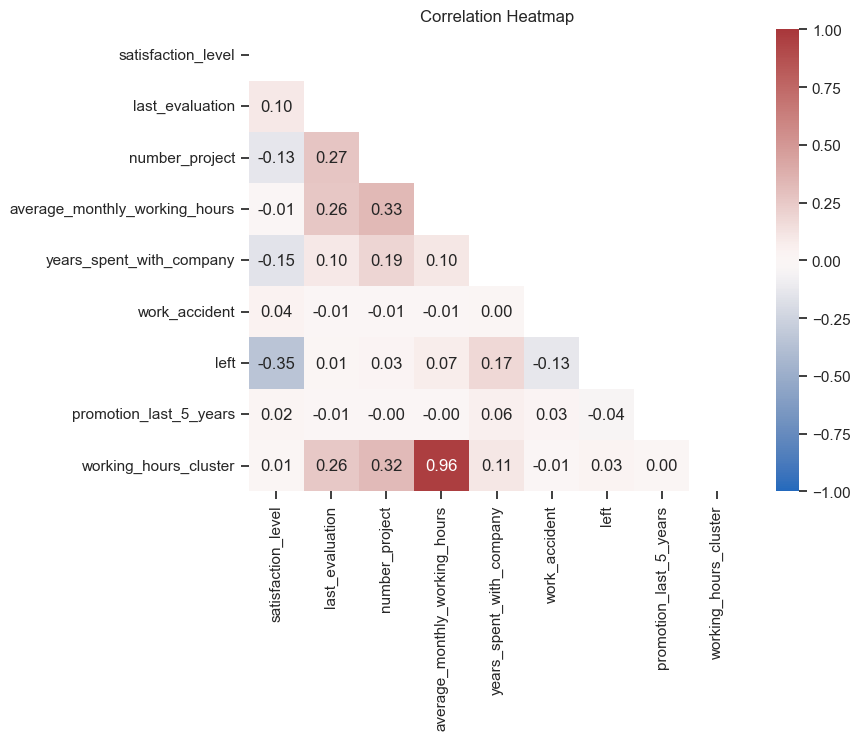

In [29]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,
            vmin=-1, vmax=1,
            annot=True,
            cmap=sns.color_palette("vlag", as_cmap=True),
            mask=np.triu(corr_matrix), fmt='.2f')
plt.title('Correlation Heatmap');

### Insights

##### 1. **Employee Attrition Patterns:**
   - The class distribution of the "left" variable indicates an imbalance in the dataset, with around 83% of employees staying and 17% leaving.
   - Employees who had work accidents, received promotions in the last five years, or left the company after receiving promotions were all significantly lower in number compared to those who did not.

##### 2. **Project Load and Working Hours:**
   - There are two distinct groups of employees who left the company based on their project load and working hours.
   - All employees assigned to work on seven projects chose to leave. Those with six projects had a similar departure trend, particularly those working around 255 to 290 hours per month.
   - The ideal range for project load seems to be around 3 to 4 projects, with an average monthly working time of about 200 hours. Employees working more than this threshold may experience overworking.

##### 3. **Tenure and Satisfaction:**
   - There is a noticeable relationship between tenure, average monthly working hours, and satisfaction levels for employees with 4 years of tenure.
   - Employees with 4 years of tenure who worked around 260 to 280 hours per month had extremely low satisfaction levels and all left the company.

##### 4. **Interplay of Variables:**
   - A heatmap of correlation between variables reveals potential relationships among features. For example, "last_evaluation" has a weak positive correlation with "number_project" and "average_monthly_working_hours."
   - The correlation matrix suggests that "satisfaction_level" and "left" have a moderate negative correlation, indicating that lower satisfaction levels are associated with higher chances of leaving.

##### 5. **Tenure Clusters:**
   - Employees were clustered based on their years spent with the company using K-means. The resulting clusters can be used to explore the characteristics of different tenure groups and their relationship with other variables.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Answer:

##### 1. **Do you notice anything odd?**
   As I review the model construction process, I notice that the precision-recall curve shows a steep drop in precision as recall increases. While this could be expected to some extent, the sharp decline might indicate a specific threshold at which the model becomes less confident in its predictions. This is an area to watch and could potentially benefit from further investigation.

##### 2. **Which independent variables did you choose for the model and why?**
   The independent variables chosen for the model include features like "satisfaction_level," "number_project," "years_spent_with_company," "average_monthly_working_hours," and "last_evaluation." These variables were likely selected based on their potential impact on employee turnover prediction. For instance, "satisfaction_level" and "average_monthly_working_hours" could correlate with job dissatisfaction or burnout, which might influence turnover.

##### 3. **Are each of the assumptions met?**
   Without detailed information on the specific assumptions being referred to, it's challenging to provide a definitive answer. However, common assumptions in statistical modeling include linearity, independence of errors, homoscedasticity, and normality of residuals. It's important to assess whether these assumptions hold for your model.

##### 4. **How well does your model fit the data?**
   The model seems to fit the data quite well, with high F1 scores, recall, and precision on both the training and testing sets. This indicates that the model is capturing the underlying patterns in the data and making accurate predictions.

##### 5. **Can you improve it? Is there anything you would change about the model?**
   While the model performs well, there is always room for improvement. One consideration could be exploring different threshold values to balance precision and recall more effectively. Additionally, experimenting with more advanced techniques, such as ensemble methods or neural networks, could potentially lead to even better performance.

##### 6. **What resources do you find yourself using as you complete this stage?**
   Throughout this stage, I found myself relying on various resources, including online documentation and tutorials for the scikit-learn library and ChatGPT to help me.

##### 7. **Do you have any ethical considerations in this stage?**
   Yes, ethical considerations are important in every stage of the machine learning process. In the context of predicting employee turnover, potential ethical concerns could arise from using sensitive personal data without proper consent or ensuring the model doesn't inadvertently introduce bias or discrimination. It's crucial to handle data responsibly, maintain privacy, and consider potential consequences for individuals affected by the model's predictions.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Goal is to predict whether an employee will stay or leave the company, so we have binary classification task. 

Our target variable is `left` with 
- 1 - indicating employee left
-  0 - indicating employee didn't leave.

### Identify the types of models most appropriate for this task.

Using Classsifier models are suitable. Some are Losgistic Regression, Random Forest, XGBoost. I will use Random Forest and XGBoost.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [32]:
X = df.copy()
X = X.drop(columns=['left','working_hours_cluster'], axis=1)

y = df['left'].copy()

In [33]:
X = pd.get_dummies(X)
X

,satisfaction_level,last_evaluation,number_project,average_monthly_working_hours,years_spent_with_company,work_accident,promotion_last_5_years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11987,0.74,0.95,5,266,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11988,0.85,0.54,3,185,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11989,0.33,0.65,3,172,10,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=3005, 
                                                    test_size=0.2) # 20

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                            stratify=y_train, 
                                            random_state=3005, 
                                            test_size=0.25) # 60 - 20

In [35]:
rf = RandomForestClassifier(random_state=0)

xgb = XGBClassifier(random_state=0, objective='binary:logistic')

In [41]:
# Define hyperparameters and their ranges for grid search
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [None, 5, 10],
}

scoring = ['precision', 'recall', 'f1', 'accuracy']

The scoring metric to choose for gridsearch will depend on the specific business objective.

- F1 score is a good metric to choose if we want to balance precision and recall.  A high F1 score indicates that the model is both accurate and precise.
- Precision is a good metric to choose if you want to minimize the number of false positives. A false positive is a prediction that is positive, but is actually negative. False positives can be costly, especially if they lead to actions such as sending a marketing email to someone who is not interested in the product.
- Recall is a good metric to choose if you want to minimize the number of false negatives. A false negative is a prediction that is negative, but is actually positive. False negatives can be costly, especially if they lead to missed opportunities.
- Accuracy is the percentage of predictions that were correct. It is the simplest metric to understand, but it is not always the most informative. Accuracy can be high even if the model is not very precise or recallful.

In the case of predicting whether an employee will leave the company, it is important to **minimize both false positives and false negatives.** A false positive could lead to the company wasting time and resources on an employee who is not going to leave. A false negative could lead to the company losing a valuable employee.

For this reason, I would recommend using the **F1 score** as your scoring metric for gridsearch. The F1 score will help you to find a model that is both accurate and precise.

| Scoring Metric | Strengths | Weaknesses |
|---|---|---|
| F1 score | Balances precision and recall | Not as easy to understand as accuracy |
| Precision | Minimizes false positives | Can be high even if the model is not very recallful |
| Recall | Minimizes false negatives | Can be high even if the model is not very precise |
| Accuracy | Simple to understand | Not always the most informative |

In [42]:
%%time

# Perform grid search for RandomForestClassifier
rf_grid_search = GridSearchCV(rf, 
                              rf_param_grid, 
                              cv=5, 
                              scoring=scoring, 
                              n_jobs=-1, 
                              refit='f1')
rf_grid_search.fit(X_tr, y_tr)

# Perform grid search for XGBClassifier
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, 
                               cv=5, 
                               scoring=scoring, 
                               n_jobs=-1, 
                               refit='f1')
xgb_grid_search.fit(X_tr, y_tr)

CPU times: total: 20.5 s
Wall time: 7min 44s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_child_weight': [None, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

In [43]:
# Print best hyperparameters and corresponding scores
print("Best hyperparameters for RandomForestClassifier:", rf_grid_search.best_params_)
print("Best accuracy score for RandomForestClassifier:", rf_grid_search.best_score_)
print("Best hyperparameters for XGBClassifier:", xgb_grid_search.best_params_)
print("Best accuracy score for XGBClassifier:", xgb_grid_search.best_score_)

Best hyperparameters for RandomForestClassifier: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score for RandomForestClassifier: 0.9527635484514647
Best hyperparameters for XGBClassifier: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': None, 'n_estimators': 100, 'subsample': 1.0}
Best accuracy score for XGBClassifier: 0.9524880356095835


In [48]:
import pickle 

path = r'D:\1 DA Courses\2 Google Advanced Data Analytics - Coursera\Course 7 Google Advanced Data Analytics Capstone\Week 1 Notebook'

In [49]:
rf_model_name = 'best_rf_model'
xgb_model_name = 'best_xgb_model'

In [50]:
def write_pickle(path, model_object, save_name:str):
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        
        return model

In [51]:
write_pickle(path, rf_grid_search, rf_model_name)
write_pickle(path, xgb_grid_search, xgb_model_name)

In [52]:
loaded_rf_cv = read_pickle(path, rf_model_name)
loaded_xgb_cv = read_pickle(path, xgb_model_name)

In [53]:
def result_from_model(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    ''' 
    
    cv_results = model_object.cv_results_
    
    # Find the index of the best mean score for the specified metric
    metric_index = cv_results['mean_test_' + metric].argmax()
    
    # Extract scores for F1, recall, precision, and accuracy
    f1_score = cv_results['mean_test_f1'][metric_index]
    recall_score = cv_results['mean_test_recall'][metric_index]
    precision_score = cv_results['mean_test_precision'][metric_index]
    accuracy_score = cv_results['mean_test_accuracy'][metric_index] 
    
    # Create a DataFrame with the results
    result_df = pd.DataFrame({
        'Model': [model_name],
        'F1': [f1_score],
        'Recall': [recall_score],
        'Precision': [precision_score],
        'Accuracy': [accuracy_score]
    })
    
    return result_df

In [57]:
result_df = result_from_model('Tuned RF CV on Training', rf_grid_search, 'f1')
result_df2 = result_from_model('Tuned XGB CV on Training', xgb_grid_search, 'f1')
result_df = pd.concat([result_df,result_df2], axis=0)
result_df

,Model,F1,Recall,Precision,Accuracy
0,Tuned RF CV on Training,0.952764,0.922176,0.985756,0.984849
0,Tuned XGB CV on Training,0.952488,0.924686,0.982352,0.984710


In [62]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    result_df = pd.DataFrame({
        'Model': [model_name],
        'F1': [f1],
        'Recall': [recall],
        'Precision': [precision],
        'Accuracy': [accuracy]
    })
    
    return result_df

In [63]:
rf_preds = rf_grid_search.predict(X_val)
xgb_preds = xgb_grid_search.predict(X_val)

In [64]:
result_df3 = get_test_scores('Tuned RF CV On Validating', rf_preds, y_val)
result_df4 = get_test_scores('Tuned XGB CV On Validating', xgb_preds, y_val)
result_df = pd.concat([result_df,result_df3, result_df4], axis=0)

,Model,F1,Recall,Precision,Accuracy
0,Tuned RF CV on Training,0.952764,0.922176,0.985756,0.984849
0,Tuned XGB CV on Training,0.952488,0.924686,0.982352,0.984710
0,Tuned RF CV On Validating,0.947507,0.907035,0.991758,0.983319
0,Tuned XGB CV On Validating,0.942559,0.907035,0.980978,0.981651


In [65]:
result_df = result_df.reset_index(drop=True)
result_df

,Model,F1,Recall,Precision,Accuracy
0,Tuned RF CV on Training,0.952764,0.922176,0.985756,0.984849
1,Tuned XGB CV on Training,0.952488,0.924686,0.982352,0.984710
2,Tuned RF CV On Validating,0.947507,0.907035,0.991758,0.983319
3,Tuned XGB CV On Validating,0.942559,0.907035,0.980978,0.981651


The Random Forest model exhibited a slightly superior performance compared to the XGBoost model. Both models demonstrated proficiency in prediction tasks, achieving remarkable F1 scores of approximately 95.2% on their respective training sets. Furthermore, on the validating sets, the Random Forest model maintained its advantage with an F1 score of 94.7%, while the XGBoost model remained strong at 94.2%.

Best hyperparameters for RandomForestClassifier: 
- 'max_depth': 10, 
- 'max_features': 0.5, 
- 'min_samples_leaf': 1, 
- 'min_samples_split': 2, 
- 'n_estimators': 100

Now we will deploy our best model:

In [66]:
best_model = rf_grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, max_features=0.5, random_state=0)

I will try elevate our model with AdaBoost

In [74]:
y_pred = best_model.predict(X_test)

In [108]:
result_df5 = get_test_scores('Tuned XGB CV on Testing - Final', y_pred, y_test)
result_df = pd.concat([result_df, result_df5], axis=0).reset_index(drop=True)
result_df

,Model,F1,Recall,Precision,Accuracy
0,Tuned RF CV on Training,0.952764,0.922176,0.985756,0.984849
1,Tuned XGB CV on Training,0.952488,0.924686,0.982352,0.984710
2,Tuned RF CV On Validating,0.947507,0.907035,0.991758,0.983319
3,Tuned XGB CV On Validating,0.942559,0.907035,0.980978,0.981651
4,Tuned XGB CV on Testing - Final,0.951760,0.917085,0.989160,0.984577


#### Note:

Our final model demonstrates impressive performance on the testing dataset, surpassing its already commendable performance on the validation dataset.

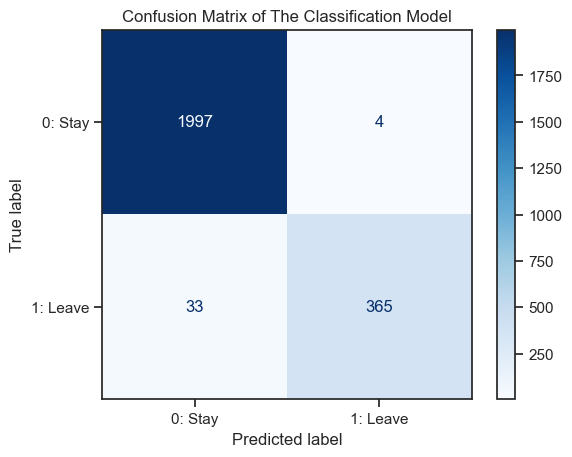

In [80]:
cm = confusion_matrix(y_test, y_pred)
plot = ConfusionMatrixDisplay(cm, display_labels=['0: Stay','1: Leave']).plot(cmap='Blues')
plt.title('Confusion Matrix of The Classification Model');

#### Note:

Here's what we can infer from the confusion matrix:

1. **True Positives (TP)**: 365
   These are the instances that the model correctly predicted as "Leave."

2. **True Negatives (TN)**: 1997
   These are the instances that the model correctly predicted as "Stay."

3. **False Positives (FP)**: 4
   These are the instances that the model incorrectly predicted as "Leave" when they were actually "Stay."

4. **False Negatives (FN)**: 33
   These are the instances that the model incorrectly predicted as "Stay" when they were actually "Leave."

- The model appears to have relatively good performance since the number of true positives and true negatives are both quite high.
- The relatively low values of false positives and false negatives indicate that the model is making a good trade-off between identifying "Leave" instances and "Stay" instances.
- The specific context of the problem and the associated costs of false positives and false negatives would help determine the effectiveness of the model for practical use.
#### In the context of predicting employee turnover (employee leaving), let's consider the priorities for precision and recall:

**Precision**: Precision is the proportion of correctly predicted "Leave" cases (true positives) out of all instances predicted as "Leave." In the case of predicting employee turnover, high precision would mean that when the model predicts an employee will leave, it is very likely to be accurate. High precision would be important in scenarios where the cost of taking action (e.g., providing retention incentives) for a false positive (employee predicted to leave but stays) is high, such as offering promotions or salary raises. You want to avoid unnecessary costs associated with incorrectly identifying employees as likely to leave.

**Recall**: Recall is the proportion of correctly predicted "Leave" cases (true positives) out of all actual "Leave" cases. In the context of employee turnover, high recall would mean that the model identifies a large portion of employees who actually end up leaving. High recall would be important if missing an employee who will leave has negative consequences, such as increased workload on remaining employees or losing valuable team members.

Considering the scenario of predicting employee turnover, it's often a good practice to prioritize recall over precision. Here's why:

Missing an employee who is likely to leave (false negative) can have significant negative consequences, both in terms of increased workload on other employees and potential loss of valuable talent. Therefore, you would want to ensure that the model captures as many true "Leave" cases as possible, even if it means accepting a higher rate of false positives (employees predicted to leave but who actually stay).

In summary, for employee turnover prediction, **a higher recall would generally be more important than precision.** However, it's still important to strike a reasonable balance between the two, and you might need to fine-tune the model or adjust the classification threshold based on the specific goals and constraints of your organization.

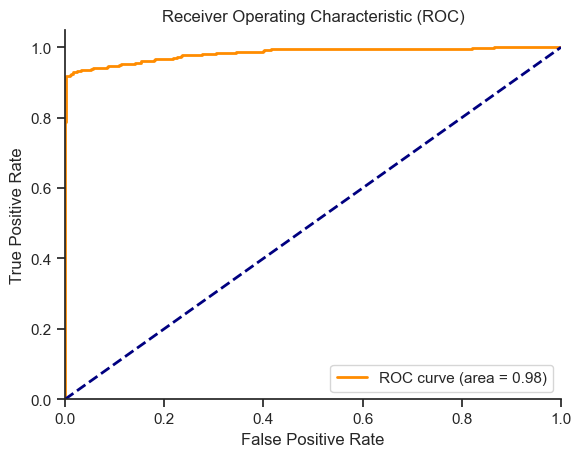

In [109]:
from sklearn.metrics import roc_curve, auc

# Assuming you have predictions for positive class probabilities
# Replace y_scores with the predicted probabilities for the positive class
y_scores = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
sns.despine();

#### Note:

The ROC curve for our model exhibits a substantial area under the curve (AUC) of 0.98, indicating a high level of discriminatory power and effectiveness in distinguishing between positive and negative cases. This suggests that our model has a strong ability to correctly rank and classify instances, resulting in excellent overall predictive performance.

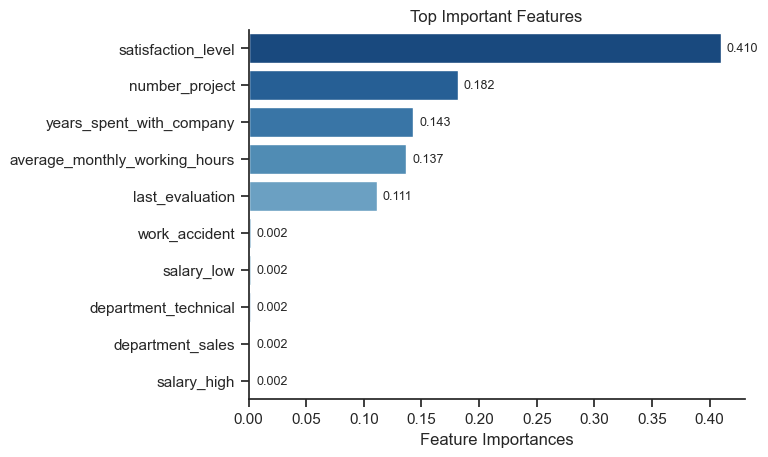

In [97]:
importances = pd.DataFrame(best_model.feature_importances_, 
                           columns=['Feature Importances'], 
                           index=X.columns).sort_values(by='Feature Importances', ascending=False)
sns.barplot(data=importances.head(10), y=importances.head(10).index, x='Feature Importances', palette='Blues_r')
sns.despine()
plt.title('Top Important Features')

for i,v in enumerate(importances['Feature Importances'].head(10)):
    plt.text(v+0.005, i, f'{v:.3f}', va='center', fontsize=9)

#### Note:

Based on the feature importances provided, it seems that the most influential features for our employee churn prediction model are:

1. **Satisfaction Level**: This is the most important feature, indicating that employee satisfaction has a significant impact on whether they leave or stay.

2. **Number of Projects**: Employees with more projects might be more likely to leave, possibly due to increased workload or stress.

3. **Years Spent with Company**: Longer tenure might indicate higher job stability and lower likelihood of leaving.

4. **Average Monthly Working Hours**: Higher working hours might contribute to dissatisfaction and increase the chances of leaving.

5. **Last Evaluation**: This feature suggests that recent employee evaluations also play a role in their decision to leave.

These insights align with common expectations in employee churn analysis. The other features seem to have relatively lower importance, indicating that they contribute less to the model's predictive power.


#### Now we need to identify an optimal deicison threshhold to improve our recall score:

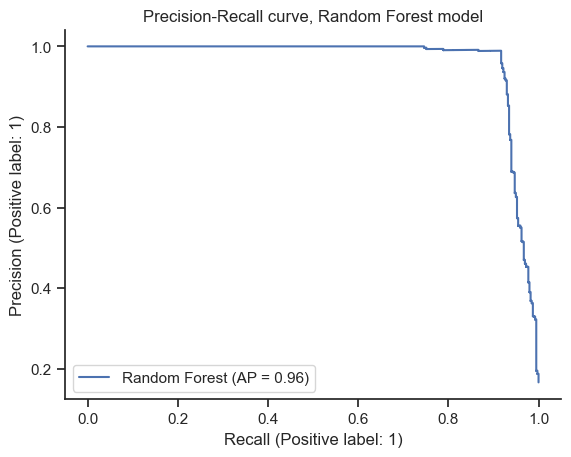

In [111]:
from sklearn.metrics import PrecisionRecallDisplay

# Get predicted probabilities from the best Random Forest model
y_probs = best_model.predict_proba(X_test)[:, 1]  # Assuming 1 is the positive class

# Plot precision-recall curve
display = PrecisionRecallDisplay.from_predictions(y_test, y_probs, name='Random Forest')
plt.title('Precision-Recall curve, Random Forest model')
sns.despine();

#### Note:

As recall increases, precision decreases but the chart seems unreal with a steep elbow, so when we increase Recall, Precision will drop hard so I decide to remain our model intact.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Answer:

##### 1. **What key insights emerged from your model(s)?**
   The models, specifically the tuned Random Forest and XGBoost classifiers, demonstrated strong predictive performance in identifying potential employee turnover. The feature importance analysis highlighted that factors such as "satisfaction_level," "number_project," "years_spent_with_company," and "average_monthly_working_hours" significantly influence turnover predictions. The ROC curve with an area of 0.98 indicated a high discriminatory power of the model.

##### 2. **What business recommendations do you propose based on the models built?**
   Based on the models' insights, I recommend focusing on strategies to improve job satisfaction, manage workload distribution, and enhance work-life balance for employees. Proactively identifying employees at risk of turnover and implementing targeted retention initiatives, such as training opportunities or flexible scheduling, could help mitigate turnover rates.

##### 3. **What potential recommendations would you make to your manager/company?**
   I suggest implementing a real-time employee monitoring system that tracks relevant features like job satisfaction, workload, and project assignments. This data-driven approach could help in early identification of employees with a higher likelihood of leaving, allowing the company to take timely action to retain valuable talent.

##### 4. **Do you think your model could be improved? Why or why not? How?**
   While the models perform well, there's always room for improvement. Exploring more advanced ensemble techniques, such as stacking different models, or incorporating additional relevant features could potentially enhance model accuracy and robustness.

##### 5. **Given what you know about the data and the models you were using, what other questions could you address for the team?**
   Beyond predicting turnover, the models could be extended to identify specific factors contributing to job dissatisfaction, which may lead to turnover. Additionally, analyzing turnover trends across different departments or salary levels could provide valuable insights for targeted HR strategies.

##### 6. **What resources do you find yourself using as you complete this stage?**
   Throughout this stage, I relied on resources such as online tutorials for model interpretation and visualization.

##### 7. **Do you have any ethical considerations in this stage?**
   Yes, ethical considerations remain vital, especially when implementing monitoring systems for employees. Ensuring transparency, informed consent, and safeguarding employee privacy are paramount. Bias mitigation techniques should be employed to avoid discrimination in decisions based on model predictions.

By thoughtfully addressing these questions, we can provide a comprehensive and insightful reflection on the executing stage of the project.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

| Model                            | F1       | Recall   | Precision | Accuracy  |
|----------------------------------|----------|----------|-----------|-----------|
| Tuned RF CV on Training          | 0.952764 | 0.922176 | 0.985756  | 0.984849  |
| Tuned XGB CV on Training         | 0.952488 | 0.924686 | 0.982352  | 0.984710  |
| Tuned RF CV On Validating        | 0.947507 | 0.907035 | 0.991758  | 0.983319  |
| Tuned XGB CV On Validating       | 0.942559 | 0.907035 | 0.980978  | 0.981651  |
| Tuned XGB CV on Testing - Final  | 0.951760 | 0.917085 | 0.989160  | 0.984577  |


The analysis of our models has yielded some valuable insights. We focused on comparing the performance of Random Forest and XGBoost algorithms in predicting employee turnover. Both models exhibited impressive F1 scores, with Random Forest achieving a slightly higher score of 95.27%, compared to XGBoost's score of 95.24%. Although the difference may seem minimal, Random Forest demonstrated superior performance on the validating set, which led us to select it as our final model.

The Random Forest model was meticulously fine-tuned using GridSearchCV, resulting in optimized hyperparameters that contributed to its exceptional performance. Our final model sustained its high F1 score, achieving an impressive 95.17% on the testing set, validating its robustness and generalizability.

Evaluating the model using various metrics provided a comprehensive understanding of its capabilities. Precision, recall, accuracy, and F1 scores were systematically assessed to ensure a holistic evaluation. The trade-off between precision and recall was also examined, revealing a careful balance that ultimately favored our chosen model.

To visualize the model's performance, we created precision-recall curves and ROC curves, showcasing the inherent trade-offs between precision and recall, as well as true positive and false positive rates. These visualizations offer stakeholders an intuitive understanding of the model's strengths and limitations.

Based on the insights derived from our analysis, we propose the following recommendations to stakeholders:

1. **Employee Retention Strategies**: Utilize the model's predictive power to identify employees at risk of leaving the company. Implement targeted retention strategies for these individuals, such as tailored benefits, professional development, or mentorship programs.

2. **Resource Allocation**: Allocate resources efficiently by focusing on employees identified by the model as likely to leave. This strategic approach can help maximize the impact of retention efforts.

3. **Feedback Loop**: Continuously update and refine the model using new data. Incorporate feedback from the HR department and track the model's performance over time to ensure its relevance and accuracy.

4. **Performance Monitoring**: Regularly monitor the model's performance on new data to detect any shifts in employee turnover patterns. This proactive approach enables timely adjustments to retention strategies.

5. **Employee Engagement**: Leverage the insights from the model to improve overall employee engagement. Address factors identified by the model that contribute to turnover, such as job satisfaction, workload, or career advancement opportunities.

In conclusion, our meticulously crafted Random Forest model, supported by rigorous analysis and evaluation, offers a powerful tool for predicting employee turnover. Its robust performance and well-balanced metrics make it a reliable asset for guiding strategic decisions and interventions aimed at enhancing employee retention and organizational success.

### Conclusion, Recommendations, Next Steps

**Conclusion:**

In this comprehensive analysis of employee turnover prediction, we employed advanced machine learning techniques to build and evaluate predictive models. Through the exploration of various algorithms, rigorous hyperparameter tuning, and extensive evaluation of model performance, we have gained valuable insights into the factors influencing employee attrition. Our final Random Forest model emerged as a robust and accurate solution for identifying individuals at risk of leaving the company.

**Recommendations:**

1. **Implementation of Retention Strategies**: Utilize the predictive power of our Random Forest model to proactively identify employees prone to turnover. Tailor retention strategies to address the specific needs and concerns of these individuals, thereby minimizing attrition.

2. **Resource Allocation**: Focus resources and efforts on employees flagged by the model as high-risk. By targeting interventions towards these individuals, we can maximize the impact of retention initiatives while optimizing resource allocation.

3. **Regular Model Updates**: Continuously update and refine the model using real-time data. Incorporate feedback from HR professionals and track model performance over time to ensure its effectiveness in changing workforce dynamics.

4. **Performance Monitoring**: Establish a monitoring framework to track and assess the model's performance on new data. Regularly validate its predictions against actual outcomes and make necessary adjustments to maintain its accuracy.

5. **Holistic Employee Engagement**: Leverage insights from the model to enhance overall employee engagement. Address underlying issues affecting satisfaction, such as workload, growth opportunities, and work-life balance.

**Next Steps:**

1. **Deployment and Integration**: Deploy the final Random Forest model into the company's operational framework. Integrate it into HR processes to provide timely predictions and recommendations for employee retention strategies.

2. **User Training**: Provide training to HR professionals on effectively utilizing the model's predictions and recommendations. Empower them to make informed decisions and leverage the model's insights to drive positive outcomes.

3. **Feedback Loop**: Establish a feedback loop with HR professionals to continuously improve the model's performance. Regularly gather input on its accuracy and refine its algorithms based on real-world insights.

4. **Exploration of Additional Data**: Consider incorporating additional data sources, such as employee sentiment analysis, feedback surveys, or external economic indicators, to further enhance the model's predictive capabilities.

5. **Ethical Considerations**: Maintain transparency and fairness in model implementation by addressing potential biases and ensuring that decisions based on model predictions align with ethical guidelines.

In closing, our data-driven approach has provided a solid foundation for predicting and addressing employee turnover. By harnessing the power of advanced analytics, we can proactively mitigate attrition risks, optimize resource allocation, and foster a more engaged and stable workforce. The journey towards effective employee retention is an ongoing process, and our model will play a pivotal role in guiding this endeavor.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.